# IS 4487 Assignment 9: Customer Segmentation with Clustering

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.

## 1. Setup and Load Data

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

- Import the necessary Python libraries
- Load the hotel bookings dataset [(Download Here)](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here)
- Display the first few rows

### In Your Response:
1. What stands out in the initial preview? Any columns or rows that seem unusual?


In [14]:
# Add code here # 1️⃣ Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: show all columns for inspection
pd.set_option('display.max_columns', None)

# 2️⃣ Load the Hotel Bookings dataset directly from GitHub (raw CSV file)
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv"
df = pd.read_csv(url)

# 3️⃣ Display the first few rows
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03


### ✍️ Your Response: 🔧
1. The dataset looks pretty clean but has some missing values in agent and company columns. There are some potential outliers in adr and more logic checks that are going to be needed.

## 2. Select and Prepare Features

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

- Choose 3–5 numeric features related to customer behavior
- Drop missing values if needed
- Standardize using `StandardScaler`

### In Your Response:
1. What features did you select and why?
2. What kinds of patterns or segments do you expect to find?


In [15]:
# Add code here 🔧
from sklearn.preprocessing import StandardScaler

# 1️⃣ Select numeric behavior-related features
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']

# 2️⃣ Drop missing values for these columns
X = df[features].dropna()

# 3️⃣ Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# 4️⃣ Create a scaled DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Preview
scaled_df.head()


,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_of_special_requests
0,2.23,-0.93,-1.31,-0.72
1,5.92,-0.93,-1.31,-0.72
2,-0.91,-0.93,-0.79,-0.72
3,-0.85,-0.93,-0.79,-0.72
4,-0.84,-0.93,-0.26,0.54


### ✍️ Your Response: 🔧
1. The lead_time, stays_in_weekend_nights, stays_in_week_nights, and total_of_special_requests were selected because they show important aspects of guest behavior. How far in advance they are booking the room, how long they stay, and how demanding they may be.

2. I esxpect to find segments such as early planners, long stay planners, people who go on a short notice, and guests who are maximizing their experience making a ton of special requests.


## 3. Apply K-Means Clustering

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

- Fit a `KMeans` model with your selected features
- Choose a value of `k` (e.g. 3, 4, or 5)
- Predict clusters and assign to each guest
- Visualize using a scatterplot of 2 features

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.

### In Your Response:
1. What `k` value did you choose, and how did you decide?
2. What types of customers seem to show up in the clusters?



cluster
0    42471
2    32324
3    28416
1    16179
Name: count, dtype: int64


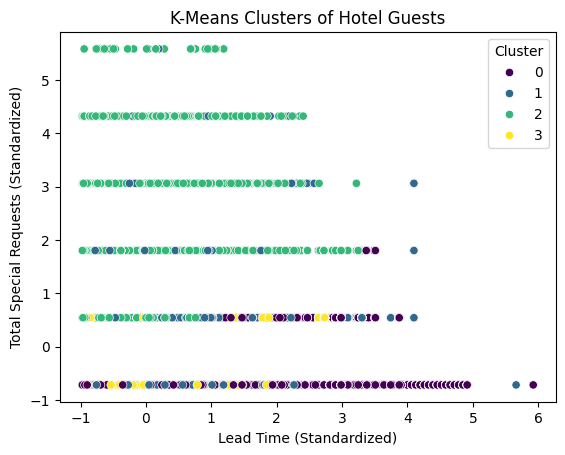

In [16]:
# Import KMeans first
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Fit KMeans model with k = 4 (you can change this to 3 or 5)
kmeans = KMeans(n_clusters=4, random_state=1)
scaled_df['cluster'] = kmeans.fit_predict(scaled_df)

# View how many guests fall into each cluster
print(scaled_df['cluster'].value_counts())

# Visualize clusters
sns.scatterplot(
    data=scaled_df,
    x='lead_time',
    y='total_of_special_requests',
    hue='cluster',
    palette='viridis'
)
plt.title('K-Means Clusters of Hotel Guests')
plt.xlabel('Lead Time (Standardized)')
plt.ylabel('Total Special Requests (Standardized)')
plt.legend(title='Cluster')
plt.show()



### ✍️ Your Response: 🔧
1. I chose k = 4 because it balances the mix of cluster sizes without over segmenting the data. This allows for distinct guest groups to emerge whiel still keeping interpretation simple.

2. The clusters suggets different guest types, such as short notice, long stay, low request guests, etc. each of these groups are a unique behavior segment that the hotel can target with tailored offers.


## 4. Apply Gaussian Mixture Model (GMM)

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

- Fit a GMM with the same number of clusters you chose in Part 3
- Predict soft clusters (remember that soft clustering deals with probabilities, not labels)
- Visualize the GMM model so that you may compare it to the KMeans scatterplot

### In Your Response:
1. How did the GMM results compare to KMeans?
2. What business questions might GMM help answer better?


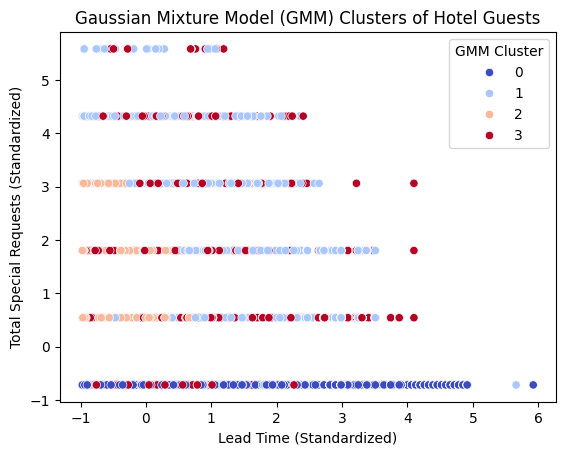

In [17]:
# Import GaussianMixture first
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

# Fit GMM with the same number of clusters (k = 4)
gmm = GaussianMixture(n_components=4, random_state=1)
gmm.fit(scaled_df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']])

# Predict soft clusters
scaled_df['gmm_cluster'] = gmm.predict(scaled_df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']])

# Visualize GMM clusters
sns.scatterplot(
    data=scaled_df,
    x='lead_time',
    y='total_of_special_requests',
    hue='gmm_cluster',
    palette='coolwarm'
)
plt.title('Gaussian Mixture Model (GMM) Clusters of Hotel Guests')
plt.xlabel('Lead Time (Standardized)')
plt.ylabel('Total Special Requests (Standardized)')
plt.legend(title='GMM Cluster')
plt.show()


### ✍️ Your Response: 🔧

1. The GMM resluts were similra to KMeans in overall pattern, but they had better transitions between clusters. Making sure that guests whos booking behavior overlap instaed of forcing them into a hard group, included them.

2. GMM can better answer questions when comparing two types of guests we have, this will help the hotel target more flexible marketing strategies that can be sent to similar groups.


## 5. Evaluate Your Models

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics.

- Calculate:
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index
- Compare both models

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering

### In Your Response:
1. Which model performed better on the metrics?
2. Would you recommend KMeans or GMM for a business analyst? Why?


In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Feature matrix (NumPy = faster)
X = scaled_df[['lead_time','stays_in_weekend_nights','stays_in_week_nights','total_of_special_requests']].to_numpy()

# Labels already fit earlier
kmeans_labels = scaled_df['cluster'].to_numpy()
gmm_labels    = scaled_df['gmm_cluster'].to_numpy()

# --- WCSS ---
kmeans_wcss = kmeans.inertia_  # fast

# GMM WCSS (vectorized)
centers = gmm.means_
diff = X - centers[gmm_labels]              # (n_samples, n_features)
gmm_wcss = np.einsum('ij,ij->i', diff, diff).sum()  # squared distances summed

# --- Evaluate on a SAMPLE to speed up (e.g., 10k) ---
rng = np.random.RandomState(1)
n = X.shape[0]
m = min(10000, n)
idx = rng.choice(n, size=m, replace=False)

# Silhouette (sampled)
kmeans_sil = silhouette_score(X[idx], kmeans_labels[idx], metric='euclidean')
gmm_sil    = silhouette_score(X[idx], gmm_labels[idx],    metric='euclidean')

# Davies–Bouldin (sampled)
kmeans_db  = davies_bouldin_score(X[idx], kmeans_labels[idx])
gmm_db     = davies_bouldin_score(X[idx], gmm_labels[idx])

print("KMeans ->  WCSS:", kmeans_wcss, "  Sil:", round(kmeans_sil,3), "  DB:", round(kmeans_db,3))
print("GMM    ->  WCSS:", round(gmm_wcss,2), "  Sil:", round(gmm_sil,3),  "  DB:", round(gmm_db,3))



KMeans ->  WCSS: 259480.5158276908   Sil: 0.236   DB: 1.344
GMM    ->  WCSS: 317537.94   Sil: 0.209   DB: 2.625


### ✍️ Your Response: 🔧
1. The KMeans performed better, which indicates tighter and more distinct clusters

2. I'd recommend KMeans for a business analyst because of the east of interpretation, speed, and how well it works.


## 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

- Review characteristics of each cluster (e.g. average `lead_time`, `special_requests`)
- Think from a marketing or hotel operations perspective

### In Your Response:
1. What do the segments represent in terms of guest behavior?
2. How could the hotel tailor services or promotions to each group?


In [19]:
# Add code here import pandas as pd
import numpy as np

# --- 0) Attach cluster labels to original rows ---
analysis_df = df.loc[scaled_df.index].copy()
analysis_df['cluster'] = scaled_df['cluster']

# Helper: length of stay
analysis_df['nights_total'] = analysis_df['stays_in_weekend_nights'] + analysis_df['stays_in_week_nights']

# --- 1) Core behavior profile per cluster ---
cluster_profile = (
    analysis_df
    .groupby('cluster')
    .agg(
        n_bookings=('cluster', 'size'),
        avg_lead_time=('lead_time', 'mean'),
        avg_weekend_nights=('stays_in_weekend_nights', 'mean'),
        avg_week_nights=('stays_in_week_nights', 'mean'),
        avg_nights_total=('nights_total', 'mean'),
        avg_special_requests=('total_of_special_requests', 'mean'),
        avg_adr=('adr', 'mean'),
        cancel_rate=('is_canceled', 'mean'),
        avg_adults=('adults', 'mean'),
        avg_children=('children', 'mean'),
        avg_babies=('babies', 'mean')
    )
    .sort_values('cluster')
)

# --- 2) Quick categorical mix (for marketing targeting) ---
def top_n_cats(s, n=3):
    vc = s.value_counts(dropna=False)
    return ', '.join([f"{idx} ({int(cnt)})" for idx, cnt in vc.head(n).items()])

cat_summary = (
    analysis_df
    .groupby('cluster')
    .agg(
        hotel_mix=('hotel', top_n_cats),                       # City vs Resort
        top_market_segments=('market_segment', top_n_cats),    # e.g., Direct, Online TA
        top_channels=('distribution_channel', top_n_cats),     # e.g., TA/TO, Direct, Corporate
        top_meals=('meal', top_n_cats),                        # e.g., BB, HB, SC
        top_deposits=('deposit_type', top_n_cats)              # No Deposit, Non Refund, etc.
    )
    .sort_values('cluster')
)

# --- 3) Ops-friendly signals (parking, room changes, upgrades/downgrades) ---
ops_signals = (
    analysis_df
    .assign(upgraded=lambda d: (d['assigned_room_type'] != d['reserved_room_type']).astype(int))
    .groupby('cluster')
    .agg(
        avg_parking=('required_car_parking_spaces', 'mean'),
        avg_booking_changes=('booking_changes', 'mean'),
        upgrade_rate=('upgraded', 'mean')  # proxy for upgrades/downgrades
    )
    .sort_values('cluster')
)

# --- 4) Nicely formatted outputs ---
pd.options.display.float_format = '{:,.2f}'.format

print("\n=== Cluster Behavior Profile (means & rates) ===")
display(cluster_profile)

print("\n=== Cluster Categorical Mix (counts of top categories) ===")
display(cat_summary)

print("\n=== Operations Signals (staffing/rooms/parking) ===")
display(ops_signals)

# --- 5) Optional: lightweight textual hints per cluster (marketing & ops) ---
def quick_hint(row):
    hints = []
    if row['avg_lead_time'] >= analysis_df['lead_time'].median():
        hints.append("Early planners → target with advance-purchase promos")
    else:
        hints.append("Late bookers → push last-minute deals / mobile offers")
    if row['avg_special_requests'] > analysis_df['total_of_special_requests'].median():
        hints.append("High service needs → upsell concierge, premium rooms")
    if row['cancel_rate'] > analysis_df['is_canceled'].mean():
        hints.append("High cancel risk → require deposit / flexible but priced plans")
    if row['avg_nights_total'] > analysis_df['nights_total'].median():
        hints.append("Longer stays → weekly rates / packages")
    return " | ".join(hints)

hints = cluster_profile.apply(quick_hint, axis=1).to_frame('marketing_ops_hints')
print("\n=== Quick Marketing & Ops Hints by Cluster ===")
display(hints)



=== Cluster Behavior Profile (means & rates) ===


,n_bookings,avg_lead_time,avg_weekend_nights,avg_week_nights,avg_nights_total,avg_special_requests,avg_adr,cancel_rate,avg_adults,avg_children,avg_babies
cluster,,,,,,,,,,,
0,42471,143.04,0.18,2.07,2.25,0.08,93.21,0.49,1.78,0.06,0.00
1,16179,148.32,2.36,5.86,8.22,0.63,105.80,0.37,1.95,0.15,0.01
2,32324,59.51,0.59,2.09,2.68,1.52,111.59,0.19,1.92,0.14,0.02
3,28416,71.08,1.61,1.70,3.31,0.20,101.36,0.39,1.84,0.10,0.00



=== Cluster Categorical Mix (counts of top categories) ===


,hotel_mix,top_market_segments,top_channels,top_meals,top_deposits
cluster,,,,,
0,"City Hotel (32119), Resort Hotel (10352)","Groups (12292), Offline TA/TO (11343), Online ...","TA/TO (33502), Direct (5333), Corporate (3544)","BB (33674), HB (5366), SC (2795)","No Deposit (31347), Non Refund (11032), Refund..."
1,"Resort Hotel (11557), City Hotel (4622)","Online TA (7806), Offline TA/TO (4841), Direct...","TA/TO (13794), Direct (2013), Corporate (369)","BB (11128), HB (3949), SC (655)","No Deposit (15506), Non Refund (645), Refundab..."
2,"City Hotel (22141), Resort Hotel (10183)","Online TA (24737), Direct (3442), Offline TA/T...","TA/TO (27546), Direct (3773), Corporate (975)","BB (25308), SC (4541), HB (2387)","No Deposit (32296), Non Refund (18), Refundabl..."
3,"City Hotel (20448), Resort Hotel (7968)","Online TA (12729), Offline TA/TO (6036), Group...","TA/TO (23028), Direct (3526), Corporate (1789)","BB (22200), HB (2761), SC (2659)","No Deposit (25492), Non Refund (2892), Refunda..."



=== Operations Signals (staffing/rooms/parking) ===


,avg_parking,avg_booking_changes,upgrade_rate
cluster,,,
0,0.04,0.19,0.13
1,0.06,0.33,0.07
2,0.10,0.23,0.15
3,0.06,0.20,0.12



=== Quick Marketing & Ops Hints by Cluster ===


,marketing_ops_hints
cluster,
0,Early planners → target with advance-purchase ...
1,Early planners → target with advance-purchase ...
2,Late bookers → push last-minute deals / mobile...
3,Early planners → target with advance-purchase ...


### ✍️ Your Response: 🔧
1. These segments represent different groups of guest behavior and how they are acting when they are enganging with the hotel.

2. The hotel could tailor services or campaigns to these customers based on the group that they fall into. Flexible booking for business travelers, family-friendly packages for large families, last minute discounts for people who book short notice. Overall there is a countless amount of promotion that could be done to target these customer groups.


## 7. Final Reflection

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### In Your Response:
1. What was most challenging about unsupervised learning?
2. When would you use clustering instead of supervised models?
3. How would you explain the value of clustering to a non-technical manager?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1. Most challenging aspect of unsupervised learning is figuring what the clusters mean/represent. It requires context both analytical and business context to understand what groups were created.

2. Clustering is best used when there is no known target variable, such as exploring customer segments. It is able to find natural grouping in data.

3. Clustering simplifies complex data by grouping similar customers together, which can find insights that allow business to act accordingly, such as marketing efforts. Turning raw data into actionable insights.

4. This project connects to my learning outcome by applying data analytics to real world business problems. I believe I have a better understanding to translate technical results into strategic insights for decision making.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [22]:
!jupyter nbconvert --to html "assignment_09_WoodMason.ipynb"

[NbConvertApp] Converting notebook assignment_09_WoodMason.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 555476 bytes to assignment_09_WoodMason.html
